In [16]:
import torch

def generate_date(w,b,num_examples):
    x=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(x,w)+b
    y+=torch.normal(0,0.1, y.shape)
    return x,y

samples_num=1000
true_w=torch.tensor([2.0,-3.2])
true_b=4.2
vx,vy=generate_date(true_w,true_b,samples_num)
vx.shape,vy.shape


(torch.Size([1000, 2]), torch.Size([1000]))

In [25]:
def loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

def linefunction(x,w,b):
    return torch.matmul(x,w)+b


#init_w=torch.zeros(2,requires_grad=True)
init_w=torch.normal(0,0.01,(2,1),requires_grad=True)
init_b=torch.zeros(1,requires_grad=True)

i=0
while(i<10):
  loss_f=loss(linefunction(vx,init_w,init_b),vy)
  loss_f.sum().backward()
  with torch.no_grad():  
      init_w-=1/samples_num*init_w.grad
      init_b-=1/samples_num*init_b.grad
      init_w.grad.zero_()
      init_b.grad.zero_()
      i=i+1
      print(f'i:{i},loss:{loss_f.mean()},w:{init_w},b:{init_b}')


i:1,loss:16.220327377319336,w:tensor([[ 1.8715],
        [-3.2310]], requires_grad=True),b:tensor([4.3462], requires_grad=True)
i:2,loss:0.02501174993813038,w:tensor([[ 2.0019],
        [-3.1941]], requires_grad=True),b:tensor([4.1936], requires_grad=True)
i:3,loss:0.004892186261713505,w:tensor([[ 1.9992],
        [-3.2015]], requires_grad=True),b:tensor([4.1988], requires_grad=True)
i:4,loss:0.004848090000450611,w:tensor([[ 1.9993],
        [-3.2017]], requires_grad=True),b:tensor([4.1983], requires_grad=True)
i:5,loss:0.0048479316756129265,w:tensor([[ 1.9993],
        [-3.2017]], requires_grad=True),b:tensor([4.1983], requires_grad=True)
i:6,loss:0.0048479302786290646,w:tensor([[ 1.9993],
        [-3.2017]], requires_grad=True),b:tensor([4.1983], requires_grad=True)
i:7,loss:0.004847931209951639,w:tensor([[ 1.9993],
        [-3.2017]], requires_grad=True),b:tensor([4.1983], requires_grad=True)
i:8,loss:0.0048479316756129265,w:tensor([[ 1.9993],
        [-3.2017]], requires_grad=True)

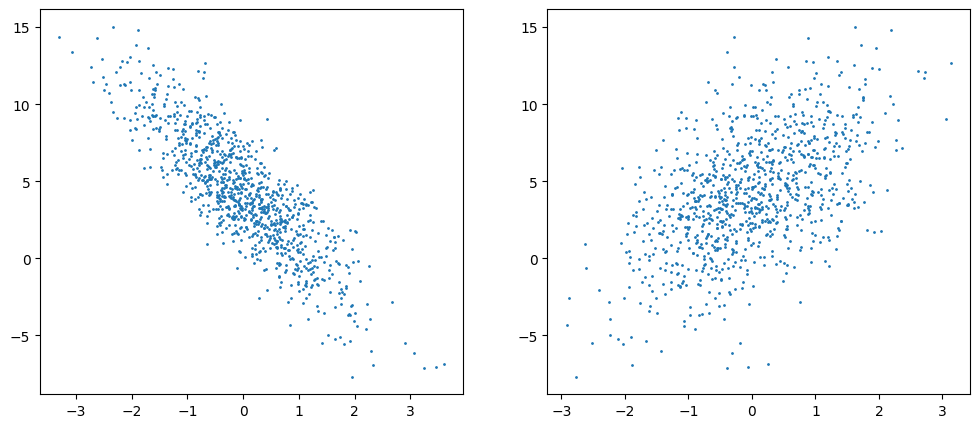

In [10]:
import matplotlib.pyplot as plt

fig,axe=plt.subplots(1,2,figsize=(12,5))

axe[0].scatter(vx[:,1],vy,1)

axe[1].scatter(vx[:,0],vy,1)
plt.show()

In [23]:
a=torch.tensor(2.0)
b=torch.tensor(3.0)
1/(a*b)

tensor(0.1667)